**Docker, Containers and Jupyter notebook**

Jupyter Lab is a web based development environment which is mainly suited for data science, journals that require coding examples and scientific application. Jupyter can run various kernels (like for example c#) however the most popular is phyton in relation to the data science community preference due to the ease of use of such language.

Since Jupyter is web based, there are various possible ways to host a notebook with the most basic being locally on your computer, from Anaconda, on the web from hosting providers such as google colab, Kaggle and so on. Each having it’s own advantages and disadvantages.

One such possible way to host Jupyter is on Docker. Docker is a toolkit that envelops various parts of a hosting environment into one platform. Docker can build images using a docker file. The docker file contains specifications about the image and each image can be a layer on top of another pre-build image. Furthermore the docker platforms hosts an artifact repository, where pre-build images can be shared using a source control like interface. However various 3rd party providers and private repositories can be setup. Finally docker platform provides a simple and intuitive runtime interface to host images on a personal computer and as such is a preferred tool among developers.

One of the main advantages of containers (rather then Docker itself) is the portability features. Many developers have faced issues running their software on different environments with different results and issues.

The advantage of docker platform is that it provides one integrated toolkit which is relatively simple to use and can run on a laptop (versus for example k8s). Further more docker integrates with development environments such as Visual Studio Code and can develop seamlessly in it.

Another advantage of containers and not necessary relating only to docker is the ability to constrain resources. Having a memory leak in one microservice should not occupy all the host memory. But rather the limit set on the container.

There are disadvantages as well to using docker and generally revolve around the platform security. Since docker repository is public there are various images that contain vulnerability issues and malware. In order to circumvent this companies employ private repositories which custom build images and security scanning.

Another disadvantage (from experience) is the time and capacity required to build an image. This usually lasts at least an hour for an average solution and requires 1 terabyte of disk space. Which might not seem a lot until you have customers not able to use your system due to a hotfix waiting in queue to build. However proper management, testing and planning resolves this issue.

**Decision Support Systems**

As the name implies the purpose of a decision support system is to empower an organization with better tools and information in the decision-making process. A decision support system is made of various components and depending on the type of various parts.

A DSS is made of a database, an engine (software) and a user interface. The database would contain all the required information for the engine to infer queries made by users through the user interface.

There are various types of DSS systems the main types are:

Data Driven: Data driven system make use mainly of the database component to be able to infer the information required for a decision. Such a system can help in inventory control, i.e. providing the relevant person the decision on what to buy at which quantity and when.

Model Driven: These systems are domain specific and provide information based on models such as scheduling lectures for a school.

Communication Driven: Such DSS use information form different communication tools such as for example chat, voice messages and emails in order to allow various teams to work on the same task while collaborating together.

Knowledge Driven: Business such as clinics can use knowledge driven dss to provide help in the diagnosis of an illness. Usually Knowledge driven dss work also with knowledge management systems where domain experts input their knowledge

Document Driven: These DSS systems derive their knowledge mainly from documents such as system policies, meeting minutes and procedures to provide answers. A common system in use is the PCI DSS azure employs to help the customers align with PCI Policies.

In recent times a new type of decision support system called “Intelligent decision support system” was re-popularized. This is a super type and utilizes heavily AI techniques to infer it’s information (rather than a statically typed fuzzy tree). With recent advancements in hardware and AI it is now possible to ingest billions of rows required to run such system.

Finally nowadays a mixture of data science, large (cheap) computational power, improved AI algorithms many companies are focusing more on decision support systems. This is being called

In [88]:
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
 #aquire the raw data required
aggregate_data_set = pd.read_csv('./data/COVID-19 Malta - Aggregate Data Set.csv')
covid_alert_malta_statistics = pd.read_csv('./data/COVID-19 Malta - Covid Alert Malta - Statistics Table.csv')
covid_tests = pd.read_csv('./data/COVID-19 Malta - COVID Tests.csv')
vaccination_data = pd.read_csv('./data/COVID-19 Malta - Vaccination Data.csv')


#source: https://ourworldindata.org/explorers/coronavirus-data-explorer
owid_covid_data = pd.read_csv('./data/owid-covid-data-malta.csv')

#this file was no longer maintained. 
#a5 = pd.read_csv('./data/Number of App Responses by Date.csv')

#merge the data into one table by date. 
all_data = (
    aggregate_data_set.merge(covid_alert_malta_statistics, how="left", on="Date")
    .merge(covid_tests, how="left", left_on="Date", right_on="Publication date")
    .merge(vaccination_data, how="left", left_on="Date", right_on="Date of Vaccination")
    .merge(owid_covid_data, how="left", left_on="Date", right_on="date")
)

#free up the memory 
del aggregate_data_set
del covid_alert_malta_statistics
del covid_tests
del vaccination_data
del owid_covid_data

#all_data.shape

#print the column together with type to start getting an idea about the contents of the data. 
column_types = all_data.dtypes 
for a in range(column_types.size):
    print(all_data.columns[a], ': ', column_types[a])

del a, column_types


Date :  object
New Cases :  int64
Total Cases :  int64
Recovered :  int64
Deaths :  int64
Active Cases :  int64
Number of downloads :  float64
Proportion of 13+ population :  object
Publication date :  object
NAA tests in previous day :  float64
Total NAA tests :  float64
Rapid antigen tests in previous day :  float64
Total rapid antigen tests :  float64
NAA and rapid antigen tests in previous day :  float64
Total NAA and rapid antigen tests :  float64
Date of Vaccination :  object
Total Vaccination Doses :  object
Primary Vaccination :  float64
Received one dose :  object
Total Booster doses :  object
Total 2nd Booster doses :  object
Omicron booster doses :  float64
Total Omicron booster doses :  float64
iso_code :  object
continent :  object
location :  object
date :  object
total_cases :  float64
new_cases :  float64
new_cases_smoothed :  float64
total_deaths :  float64
new_deaths :  float64
new_deaths_smoothed :  float64
total_cases_per_million :  float64
new_cases_per_million :  

In [90]:
#not all columns are required in this case, and some are duplicate. 

#remove the duplicate dates, used in the join
all_data.drop(['Publication date','Date of Vaccination','date'], inplace=True, axis=1)

#since we are only looking at Malta, these columns will be all the same value (e.g. Malta/Europe).
all_data.drop(['iso_code','continent','location'], inplace=True, axis=1)

#these values will be same accross as well, and would be useful if we where comparing other countries. 
all_data.drop('population_density', inplace=True, axis=1)
all_data.drop('gdp_per_capita', inplace=True, axis=1)
all_data.drop('extreme_poverty', inplace=True, axis=1)
all_data.drop('handwashing_facilities', inplace=True, axis=1)
all_data.drop('human_development_index', inplace=True, axis=1)
 
#we have too few of this data to add value to our dataset
all_data.drop('Proportion of 13+ population', inplace=True, axis=1)
all_data.drop('NAA tests in previous day', inplace=True, axis=1)
all_data.drop('Number of downloads', inplace=True, axis=1)

all_data.drop('tests_units', inplace=True, axis=1)


In [91]:
#convert the date to datetime
all_data['Date'] = pd.to_datetime(all_data['Date'], format='%d/%m/%Y')

#check for any dates that could be duplicate, before creating the primary index. 
duplicate_date_indices = [i for i, x in enumerate(all_data.duplicated(subset=['Date'])) if x]
#there was a problem with the data on 01/11/2022 which was mistyped instead of 01/12/2022
all_data.loc[duplicate_date_indices]


,Date,New Cases,Total Cases,Recovered,Deaths,Active Cases,Total NAA tests,Rapid antigen tests in previous day,Total rapid antigen tests,NAA and rapid antigen tests in previous day,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
971,2022-11-01,23,115372,113839,808,329,1536210.0,143.0,541700.0,557.0,...,8.83,20.9,30.2,4.485,82.53,533293,NaN,NaN,NaN,NaN
1001,2022-11-01,21,115839,114444,809,190,1536210.0,143.0,541700.0,557.0,...,8.83,20.9,30.2,4.485,82.53,533293,NaN,NaN,NaN,NaN
1002,2022-11-01,21,115839,114444,809,190,1536210.0,143.0,541700.0,557.0,...,8.83,20.9,30.2,4.485,82.53,533293,NaN,NaN,NaN,NaN


In [92]:
#remove the duplicate dates
all_data.drop(duplicate_date_indices, inplace=True)
all_data.reset_index(drop=True, inplace=True)

#update the index the main dataframe to use the date. 
all_data.set_index('Date', drop=True, append=False, inplace=True, verify_integrity=True)

del duplicate_date_indices

Inspect and format the data available. 

1. The density and layout of the columns 


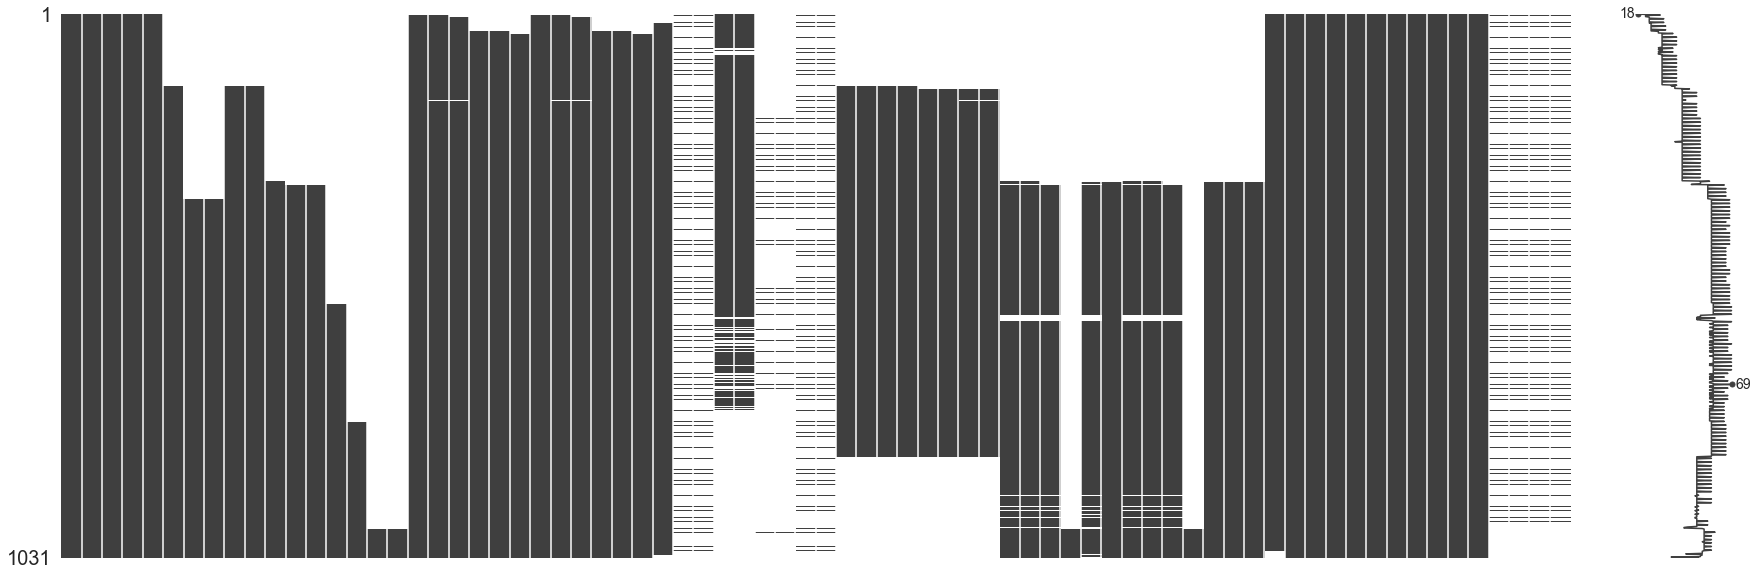

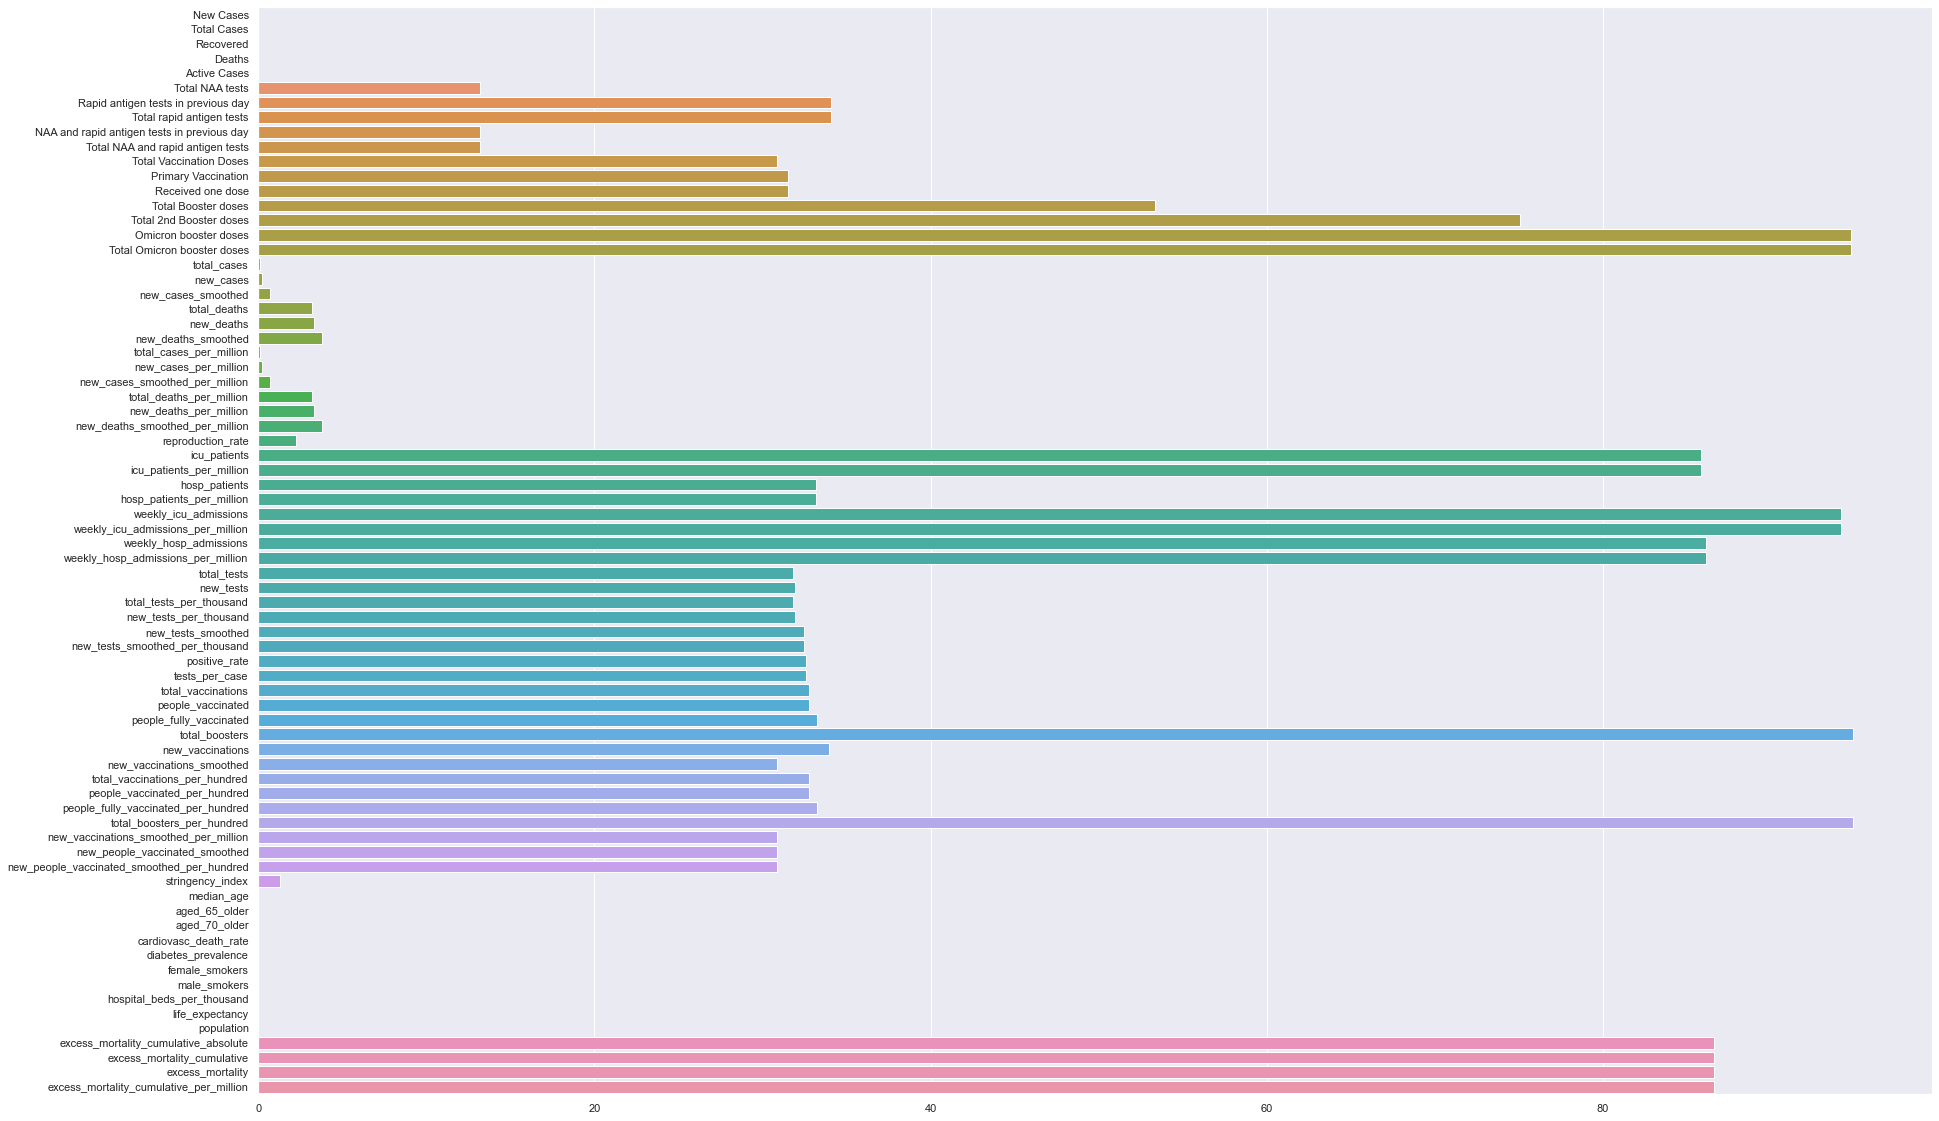

In [93]:
#this requires to run pip install missingno
import missingno
#it does give an overall very good idea about the situation of the fields. 
missingno.matrix(all_data, figsize = (30,10))

#alternativly this can be constructed manually, but not rapresneted as good in terms of where the distribution of data is. 

dataset_stats = dict()
#the inverse of the row count, to compute the % na 
r = 1 / all_data.shape[0]

#go through each column, and get the % of fields that are na. since this is (0-1) mutiply by 100 to make it more human
for column in all_data.columns:
    dataset_stats[column] = r * all_data[column].isna().sum() * 100

#some basic settings to make the plot visible. 
fig, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=1)

#sns doesn't like array seems to prefer lists.
sns.barplot(y=list(dataset_stats.keys()), x=list(dataset_stats.values()), orient = "h")

del ax, column, dataset_stats, fig, r


One of the first things to check, is the correlation between the number of tests performed and the number of active cases. By time people accepted more covid and tested less frequently. Therefore the data is only as good as the visibility there is. 

However as can be noted below, there is a ratio of correlation between the tests performed and the active cases. While the tests performed have some error in the data (negative and positive spikes).

Further more, if new cases are enlarged for display purposes a better fit can be seen. 

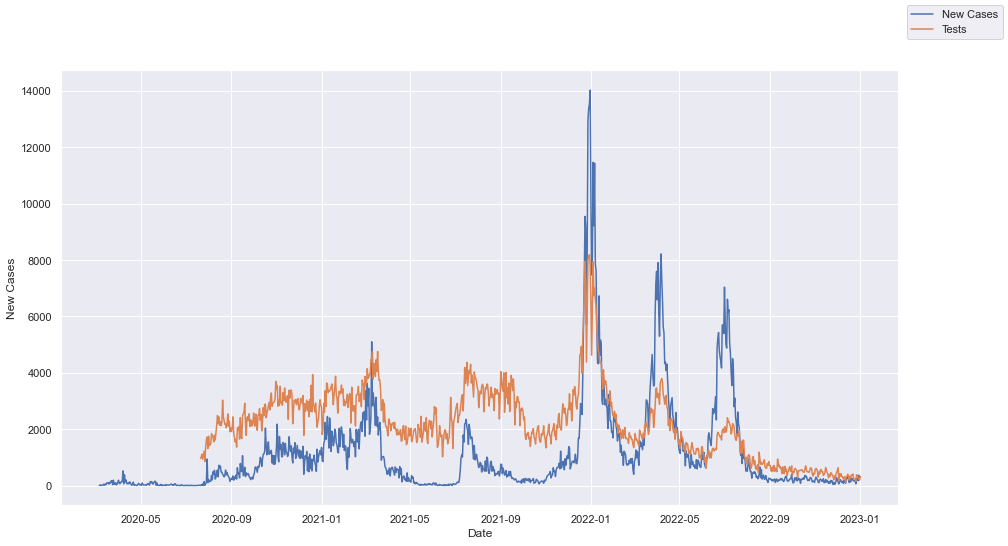

In [94]:
#some basic settings to make the plot visible. 
fig, ax = plt.subplots(figsize=(15, 8))
sns.set(font_scale=1)
sns.lineplot(y=all_data['New Cases'] * 10, x=all_data.index)
sns.lineplot(y=all_data['Total NAA and rapid antigen tests'].diff(), x=all_data.index)
fig.legend(labels=["New Cases","Tests"])

del ax, fig 


In [95]:
#Since tests are cumulative, add a new column to show the difference per day and clip out any outliers 
all_data['Tests_Diff'] = all_data['Total NAA and rapid antigen tests'].diff()
all_data['Tests_Diff'] = np.where(all_data['Tests_Diff'] < 0, 0, all_data['Tests_Diff'])
all_data['Tests_Diff'] = np.where(all_data['Tests_Diff'] > 10_000, 0, all_data['Tests_Diff'])


It's not easy to see the data in one graph if it has different magnitudes. Transform the data to be in the same magnitude 

In [96]:
#helper function to do min-max normalization
def min_max_scaling(df, cols):
    # create a new dataframe
    df_norm = pd.DataFrame()

    # apply min-max scaling
    for column in cols:
        print('Normalizing Column: ', column)
        df_norm[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

    df_norm.set_index(df.index,append=True)

    return df_norm

#helper function to do min-max normalization on percent values (since min=0 and max = 100)
def min_max_scaling_percent(df, cols):
    # create a new dataframe
    df_norm = pd.DataFrame()
    # apply min-max scaling
    for column in cols:
        print('Normalizing Column: ', column)
        df_norm[column] = df[column] / 100 
        
    return df_norm



#helper function to do min-max normalization on percent values (since min=0 and max = 100)
def min_max_scaling_diff(df, cols):
    # create a new dataframe
    df_norm = pd.DataFrame()
    # apply min-max scaling
    for column in cols:
        print('Normalizing Column: ', column)
        df_diff = df[column].diff()
        df_norm[column] = (df_diff - df_diff.min()) / (df_diff.max() - df_diff.min())
        
    return df_norm


In [97]:
#normalize the data. 
normalcols = ['New Cases','Active Cases','Tests_Diff']
percentcols = ['stringency_index','people_vaccinated_per_hundred']

#use the proper scaling type
norm = pd.concat([ min_max_scaling(all_data, normalcols), min_max_scaling_percent(all_data, percentcols)], axis=1)
 
#Add a new column, as a % of population that where active cases. 
norm['PopulationActiveCases'] = 1 / all_data['population'] * all_data['Active Cases']
norm['PopulationTests'] = 1 / all_data['population'] * all_data['Tests_Diff']

#Copy over the date. 
norm['Date'] = all_data.index

#use date as the main index
norm.set_index('Date', drop=True, append=False, inplace=True, verify_integrity=True)

#since people cannot be un-vacinated, fill na values with the previous values. 
norm['people_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)

#set any nan occurance to 0
norm.fillna(0, inplace=True)

del normalcols, percentcols

Normalizing Column:  New Cases
Normalizing Column:  Active Cases
Normalizing Column:  Tests_Diff
Normalizing Column:  stringency_index
Normalizing Column:  people_vaccinated_per_hundred


Plot the new normalized dataset. This will give a better idea of how things stand. 

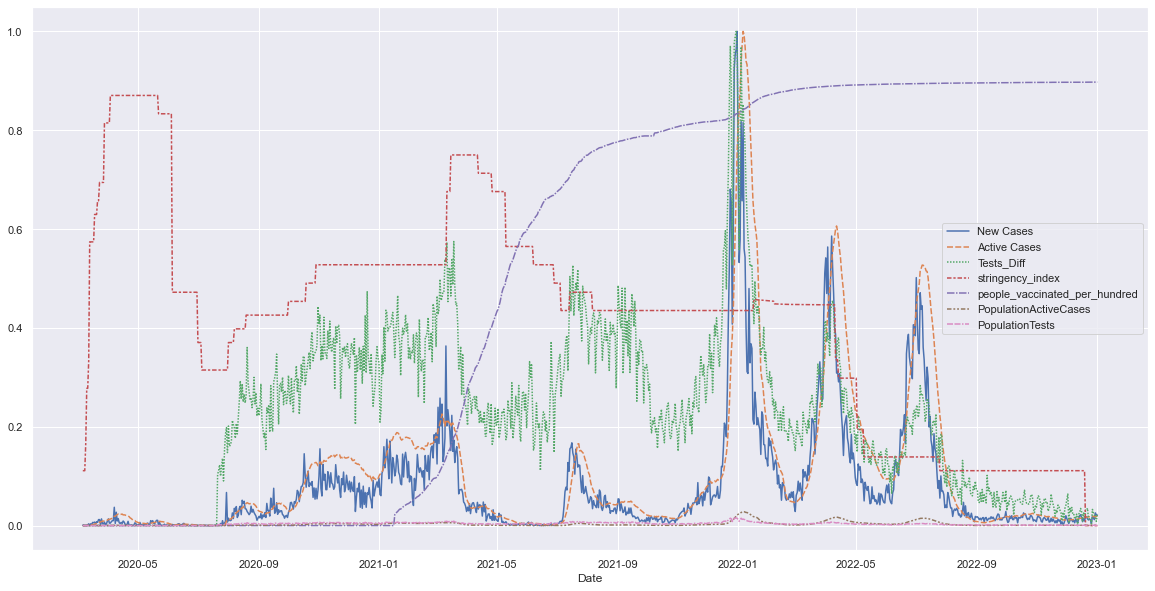

In [98]:

#some basic settings to make the plot visible. 
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)

sns.set(font_scale=1)
sns.lineplot(data=norm , ax=ax1)

plt.show()

del ax1, fig 


While there is quite a lot of data in the graph, it clearly shows correlated fields. 

1. New Cases, Active Cases, Tests Performed all have the same shape. 
2. It can be observed the when measures where reduced, 3 main outbreaks occured. 
3. When the measure where high, the postive to negative test ratio was low, when the measures where lowered positive to negative test ratio was high. 
4. Late in 2022 fewer tests where performed therefore there is lack of visibility on the data. 

Also note that PopulationActiveCases and PopulationTests give an overall feel of what % of population was covered by the tests. And as can be seen it is relativly low. 
 

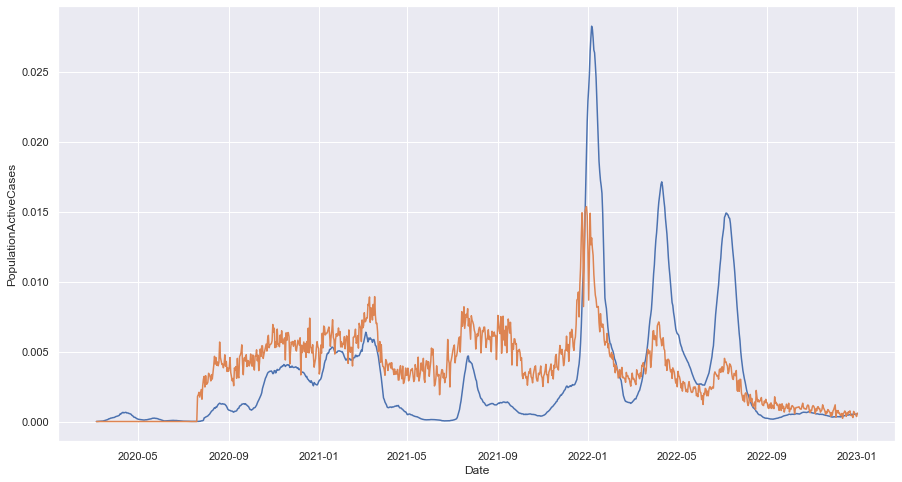

In [99]:
#some basic settings to make the plot visible. 
fig, ax = plt.subplots(figsize=(15, 8))
 
sns.set(font_scale=1)
sns.lineplot(y=norm['PopulationActiveCases'], x=norm.index)
sns.lineplot(y=norm['PopulationTests'], x=norm.index)

plt.legend = ['PopulationActiveCases', 'PopulationTests' ]
plt.show()

del fig,ax 


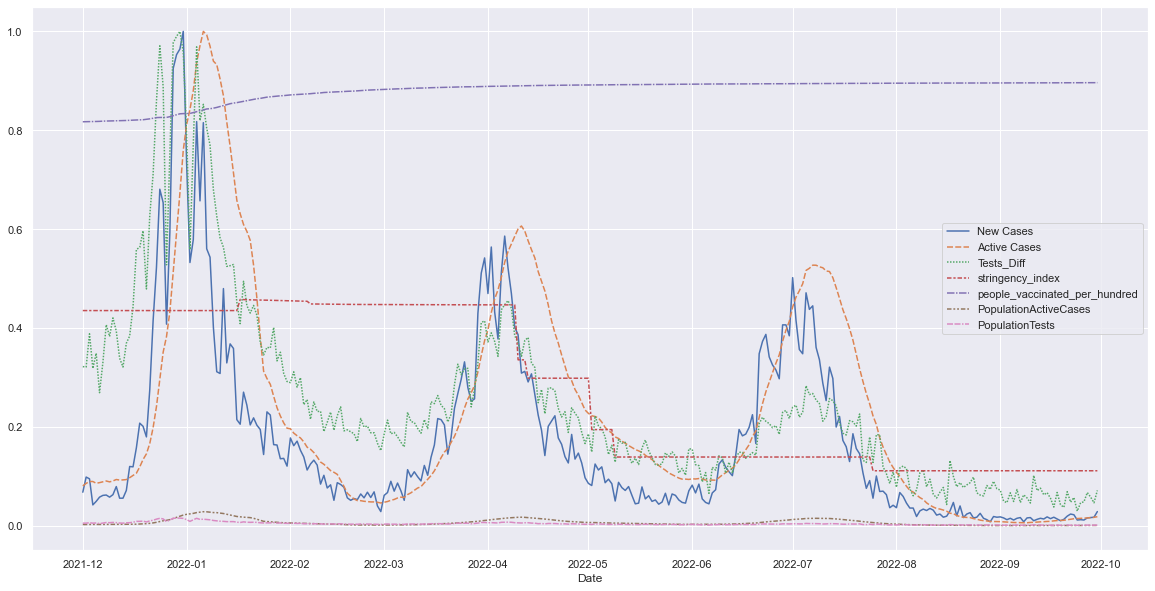

In [100]:
mask = (norm.index >= '2021-12-01') & (norm.index <= '2022-09-30')

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)

sns.set(font_scale=1)
sns.lineplot(data=norm.loc[mask] , ax=ax1)

del mask, fig, ax1 

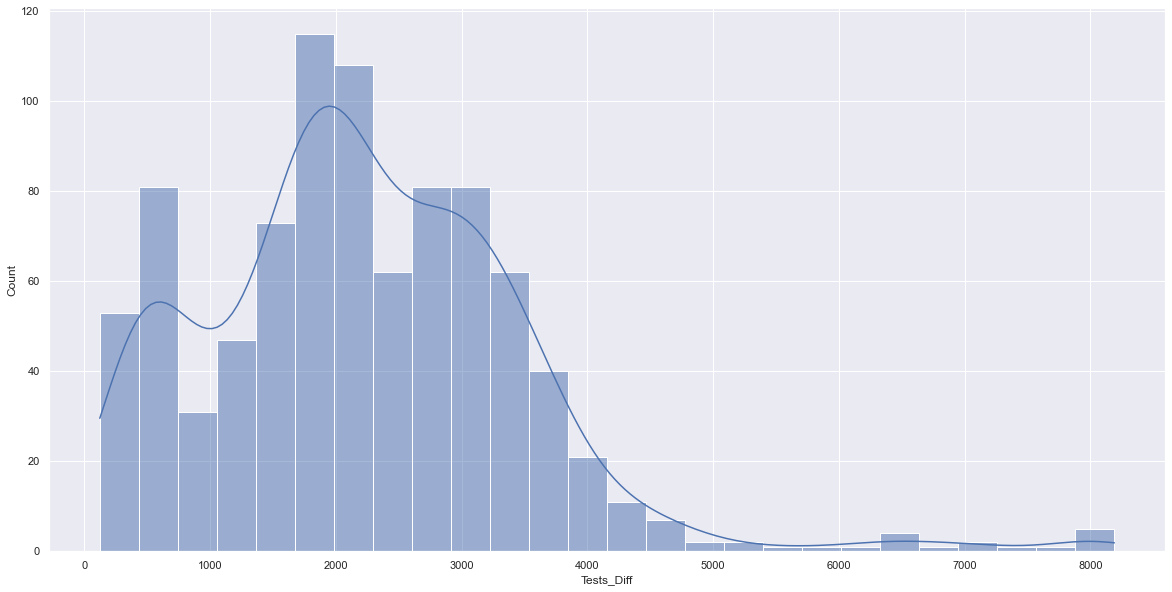

In [101]:

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)

sns.set(font_scale=1)
sns.histplot(data=all_data['Tests_Diff'], kde=True)

del fig, ax1 

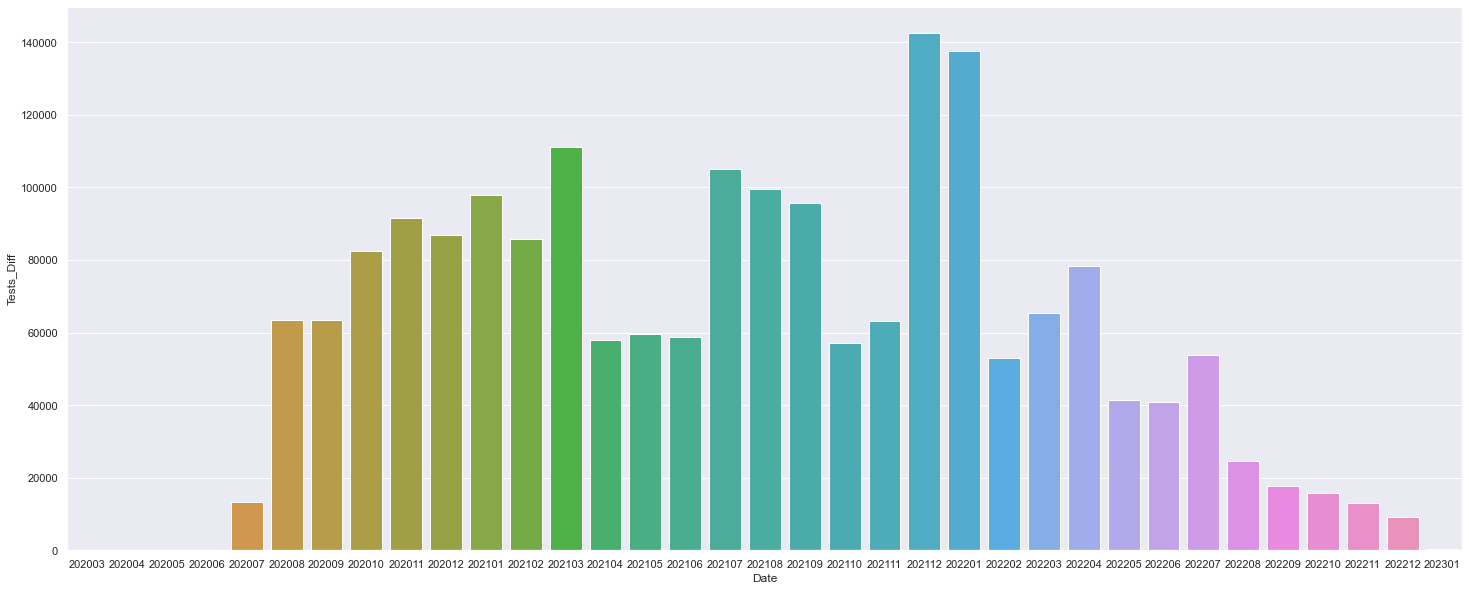

In [102]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(111)

monthlynumberoftests = all_data.groupby(all_data.index.year * 100 + all_data.index.month) ['Tests_Diff'].sum()


sns.set(font_scale=1)
sns.barplot(x=monthlynumberoftests.index, y=monthlynumberoftests, ax=ax1)

del fig, ax1, monthlynumberoftests


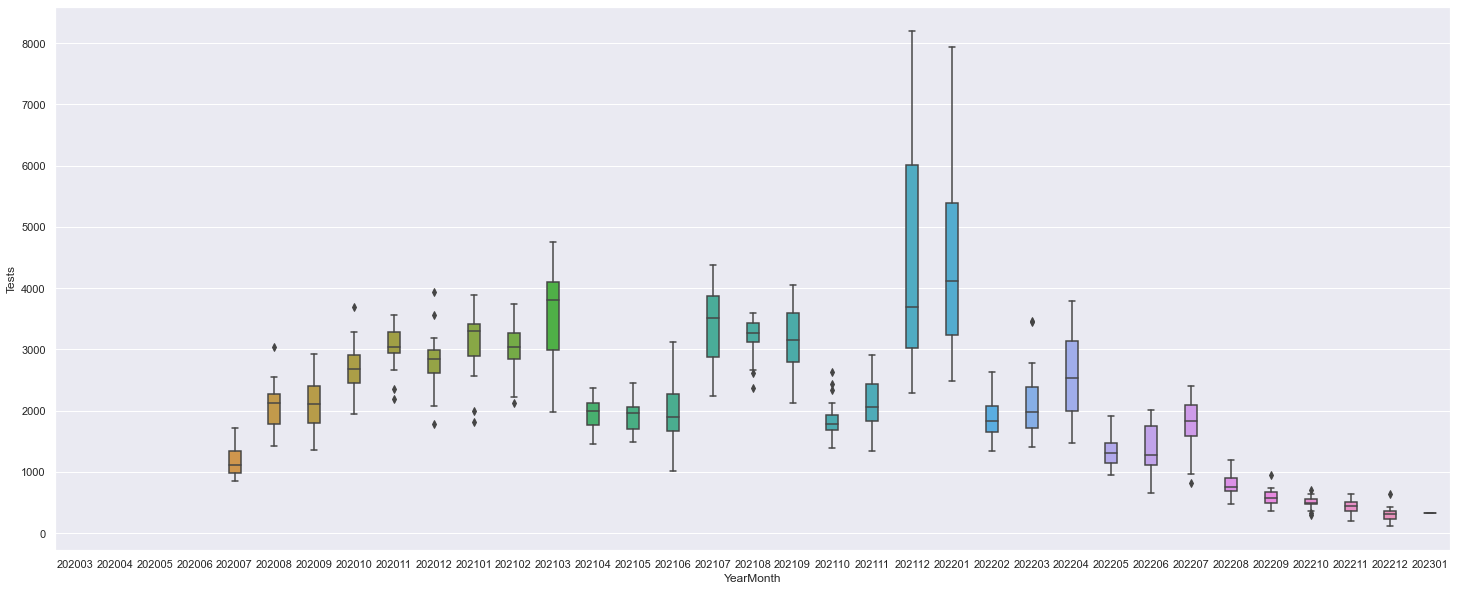

In [103]:

monthlytestsStats = pd.DataFrame()

monthlytestsStats['Tests'] = all_data['Tests_Diff']
monthlytestsStats['YearMonth'] = all_data.index.year * 100 + all_data.index.month

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(111)
sns.set(font_scale=1)
sns.boxplot( x=monthlytestsStats["YearMonth"], y=monthlytestsStats["Tests"], width=0.3);
plt.show()

del monthlytestsStats, fig, ax1 

(989, 2)


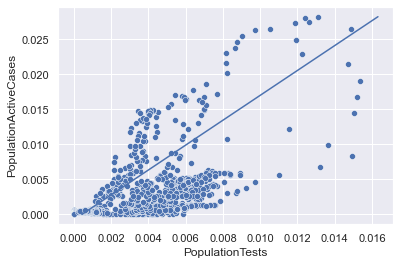

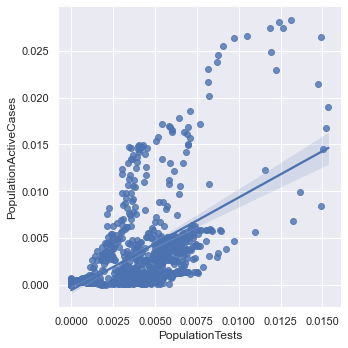

In [104]:
from sklearn.linear_model import LinearRegression
from scipy import stats 

#linear regression overfits on outliers, remove them to obtain a better fit. 
#this allows data to fit within 3 standard deveations and drop the rest. 
tfg = norm[['PopulationTests', 'PopulationActiveCases']][(np.abs(stats.zscore(norm)) < 3).all(axis=1)]

#check how many rows we dropped. 
print(tfg.shape)

x = tfg['PopulationTests'].values.reshape(-1, 1)
y = tfg['PopulationActiveCases'] 
 
#train the model. 
reg = LinearRegression().fit(x, y)
 
#fit the prediction line for display. 
linefit=reg.predict(norm['PopulationActiveCases'].values.reshape(-1, 1))

#show this on a graph
sns.scatterplot(y=norm['PopulationActiveCases'], x=norm['PopulationTests'])
sns.lineplot(x=linefit,y=norm['PopulationActiveCases'])

#seaborn has also it's own implementation of linear regression. 
sns.lmplot(data=norm, y='PopulationActiveCases', x='PopulationTests')

del linefit, reg, tfg, x, y 

In [105]:
#data source: https://excelnotes.com/holidays-malta-2020/

#load the public holidays. 
public_holidays = pd.read_csv('./data/public_holidays.csv')

#convert to proper date format. 
public_holidays['Date'] = pd.to_datetime(public_holidays['Date'], format='%b %d, %Y')

#add a flag field, this will be usefull later. 
public_holidays['IsPublicHoliday'] = 1

#merge does not allow overwritting. so if this is re-run the column needs to be dropped first. 
if 'IsPublicHoliday' in all_data: all_data.drop('IsPublicHoliday', inplace=True, axis=1)
if 'Holiday' in all_data: all_data.drop('Holiday', inplace=True, axis=1)

#allows to use join, as merge causes some issues. 
public_holidays.set_index('Date', drop=True, append=False, inplace=True, verify_integrity=True)

#merge the holidays in the main data. 
all_data = all_data.join(public_holidays, how="left", on = "Date" )
all_data['IsPublicHoliday'].fillna(0, inplace=True)

#display the data. 
public_holidays.tail(public_holidays.shape[0])

#we don't need this anymore, since we merged it in our main dataset. 
del public_holidays


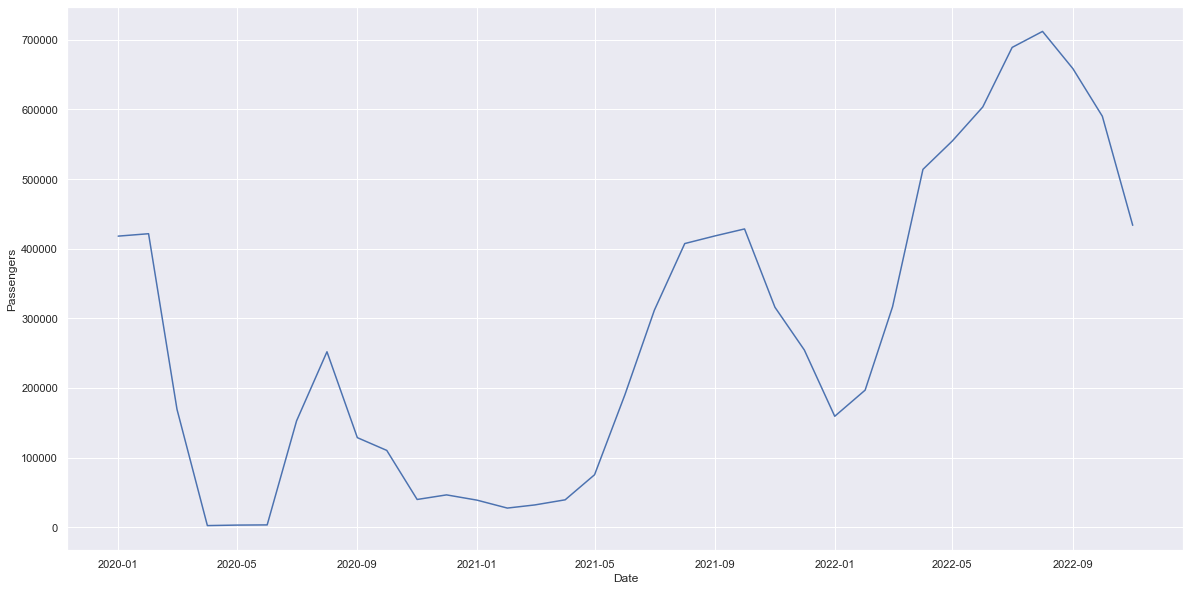

In [106]:
#source: https://www.maltairport.com/corporate/traffic-development/statistics/?date=2022-01&report=MonthlyTotals

#load the airport arrivals 
airport_arrivals = pd.read_csv('./data/airport_passengers.csv')

#parse the data. 
airport_arrivals['Date'] = pd.to_datetime(airport_arrivals['Date'], format='%d/%m/%Y')
 
#merge does not allow overwritting. so if this is re-run the column needs to be dropped first. 
if 'Passengers' in all_data: all_data.drop('Passengers', inplace=True, axis=1)

#remove the autogenerated index, or this will be copied over in the merge. 
airport_arrivals.reset_index(drop=True, inplace=True)
airport_arrivals.set_index('Date', drop=True, append=False, inplace=True, verify_integrity=True)

#merge in the main dataset
all_data = all_data.join(airport_arrivals, how="left", on = "Date")

#since only 1 unit per month is available, fill in the gap with the values. 
all_data['Passengers'].fillna(method='ffill', inplace=True)
all_data['Passengers'].fillna(0, inplace=True)

#show a plot of how the arrivals look like. 
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=airport_arrivals, x=airport_arrivals.index, y=airport_arrivals['Passengers']) 

del airport_arrivals, fig, 


Normalizing Column:  Passengers


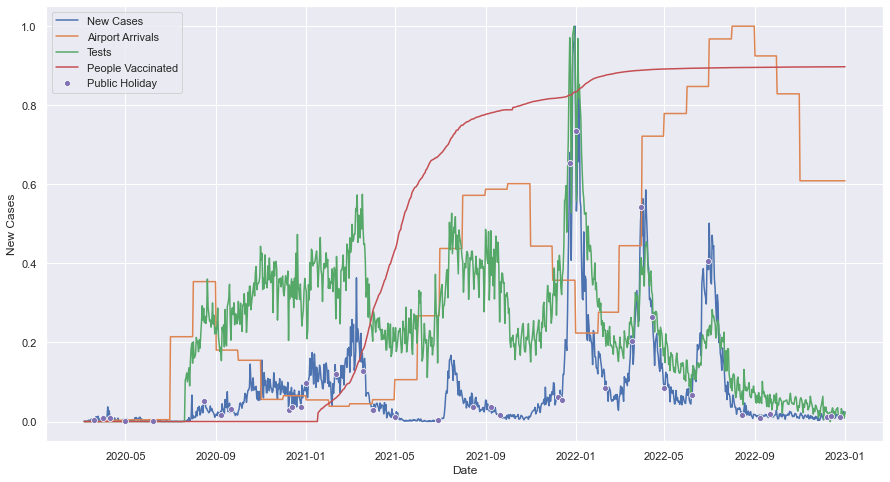

In [107]:
#some basic settings to make the plot visible. 
fig, ax = plt.subplots(figsize=(15, 8))
 
norm['AirportArrivals'] = min_max_scaling(all_data, ['Passengers'])
norm['PublicHolidayMarkers'] = norm['New Cases'] * all_data['IsPublicHoliday']
norm['PublicHolidayMarkers'] = norm['PublicHolidayMarkers'].replace(0, np.nan)

sns.set(font_scale=1)
sns.lineplot(y=norm['New Cases'], x=norm.index, label="New Cases")
sns.lineplot(y=norm['AirportArrivals'], x=norm.index, label="Airport Arrivals")
sns.lineplot(y=norm['Tests_Diff'], x=norm.index, label="Tests")
sns.lineplot(y=norm['people_vaccinated_per_hundred'], x=norm.index, label="People Vaccinated")
sns.lineplot(y=norm['PublicHolidayMarkers'], x=norm.index,marker='o', linestyle='', label="Public Holiday")
 
plt.show()

del fig,ax 


Further Work:

Since tests have lowered recently, confirmed deaths should be an indicator of the number of cases. This would need investigation. However a quick plot below doesn't show promising and would require further study. 

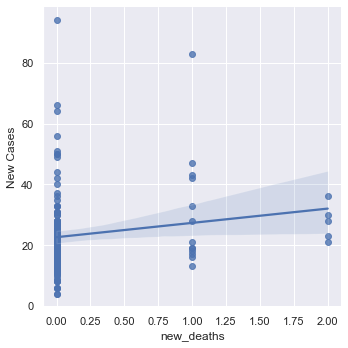

In [108]:
#since there are too few deaths, a linear regression doesn't show much. 
mask = (norm.index >= '2022-08-01')
sns.lmplot(data=all_data.loc[mask], y='New Cases', x='new_deaths')

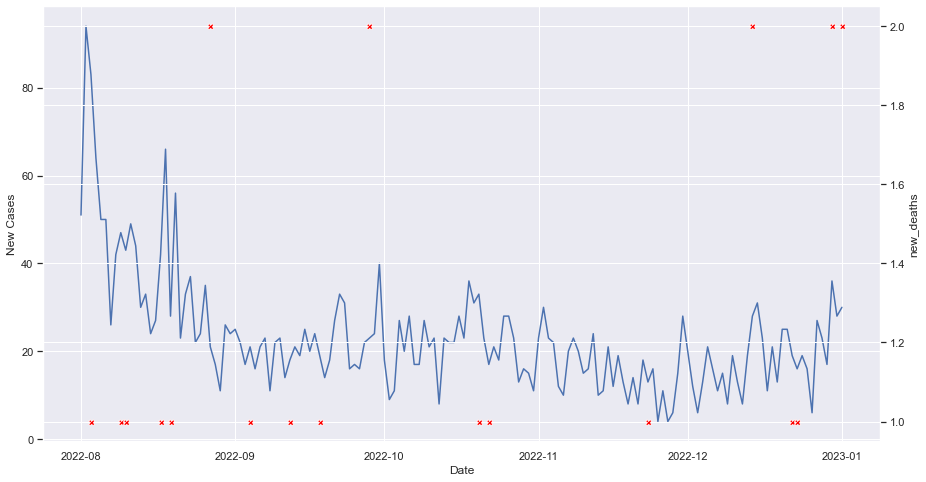

In [109]:
fig, ax = plt.subplots(figsize=(15, 8))

#filter the data only for the period where there is a low test rate. 
mask = (norm.index >= '2022-08-01')
lowtestperiod = all_data.loc[mask]

#create a line plot for all the new cases. 
sns.lineplot(data=lowtestperiod, y='New Cases', x=lowtestperiod.index)
ax2 = plt.twinx()
#set the deaths as X for better visibility (since there are a lot of 0s.) Also hide 0 values. 
sns.lineplot(y=lowtestperiod['new_deaths'].replace(0, np.nan), x=lowtestperiod.index, marker='X', color='red', linestyle='', ax=ax2)

del mask, lowtestperiod
del fig, ax, ax2 